In [4]:
pip install yfinance --upgrade --no-cache-dir 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.9 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 8.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=267713 sha256=1c861bf0865f838cbb2f8297c915d7ad7dd889b6f35fb121ee809f933399c380
  Stored in directory: /private/var/folders/cj/lstdskzd2631ftpxgscxdnxr0000gn/T/pip-ephem-wheel-cache-r424rze0/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")

tesla_data.reset_index(inplace=True)

tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [13]:
!pip install requests beautifulsoup4 pandas lxml


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "Quarterly Revenue" in str(table):  # Identify the correct table
        tesla_revenue = pd.read_html(str(table), flavor="bs4")[0]
        break  
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True)

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce").fillna(0)

tesla_revenue.tail()


/var/folders/cj/lstdskzd2631ftpxgscxdnxr0000gn/T/ipykernel_71097/886853276.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table), flavor="bs4")[0]


,Date,Revenue
58,2010-06-30,28.0
59,2010-03-31,21.0
60,2009-12-31,0.0
61,2009-09-30,46.0
62,2009-06-30,27.0


In [16]:
import yfinance as yf
import pandas as pd

gme_data = yf.download("GME", period="5y")  

gme_data.reset_index(inplace=True)

gme_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2020-02-10,0.9850,1.0250,0.9350,0.9625,11108000
1,2020-02-11,1.0050,1.0600,0.9875,0.9950,13660000
2,2020-02-12,1.0475,1.1275,1.0175,1.0325,19282400
3,2020-02-13,1.0275,1.0650,1.0175,1.0300,8326800
4,2020-02-14,1.0050,1.0475,1.0050,1.0275,6330800


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "Quarterly Revenue" in str(table):  # Identify the correct table
        gme_revenue = pd.read_html(str(table), flavor="bs4")[0]
        break 
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce").fillna(0)
gme_revenue.tail()

/var/folders/cj/lstdskzd2631ftpxgscxdnxr0000gn/T/ipykernel_71097/2124665951.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table), flavor="bs4")[0]


,Date,Revenue
59,2010-01-31,3524
60,2009-10-31,1835
61,2009-07-31,1739
62,2009-04-30,1981
63,2009-01-31,3492


In [3]:
!conda install -c conda-forge matplotlib -y


done
doneing environment: | 


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



## Package Plan ##

  environment location: /Users/adamhussain/anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hf0a4a13_0         155 KB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    openssl-3.4.0              |       h81ee809_1         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  ca-certificat

In [2]:
!pip install --upgrade --force-reinstall jupyter matplotlib


  Obtaining dependency information for jupyter from https://files.pythonhosted.org/packages/38/64/285f20a31679bf547b75602702f7800e74dbabae36ef324f716c02804753/jupyter-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c7/8b/92e9da1f28310a1f6572b5c55097b0c0ceb5e27486d85fb73b54f5a9b939/matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for notebook from https://files.pythonhosted.org/packages/22/9b/76e50ee18f183ea5fe1784a9eeaa50f2c71802e4740d6e959592b0993298/notebook-7.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-console from https://files.pythonhosted.org/packages/ca/77/71d78d58f15c22db16328a476426f7ac4a60d3a5a7ba3b9627ee2f7903d4/jupyter_console-6.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for nbconvert from https://files.pythonhosted.org/packages/cc/9a/cd673b2f773a12c992f41309ef81b99da1690426bd2f96957a7ade0d3e

In [1]:
import matplotlib.pyplot as plt

# Define the function to create the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

# Define the function to create the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


In [7]:
import yfinance as yf

# Download GME stock data
gme_data = yf.download("GME", start="2020-01-01", end="2024-12-31")

# Reset the index for proper formatting
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [8]:
print(gme_data.info())
print(gme_data.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   (Date, )       1257 non-null   datetime64[ns]
 1   (Close, GME)   1257 non-null   float64       
 2   (High, GME)    1257 non-null   float64       
 3   (Low, GME)     1257 non-null   float64       
 4   (Open, GME)    1257 non-null   float64       
 5   (Volume, GME)  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB
None
Price        Date      Close       High        Low       Open    Volume
Ticker                   GME        GME        GME        GME       GME
1252   2024-12-23  30.900000  31.110001  29.780001  29.820000   8226500
1253   2024-12-24  31.139999  31.590000  30.580000  31.000000   5523500
1254   2024-12-26  32.990002  34.369999  31.600000  32.619999  20432900
1255   2024-12-27  32.200001  33.049999  30.730000 

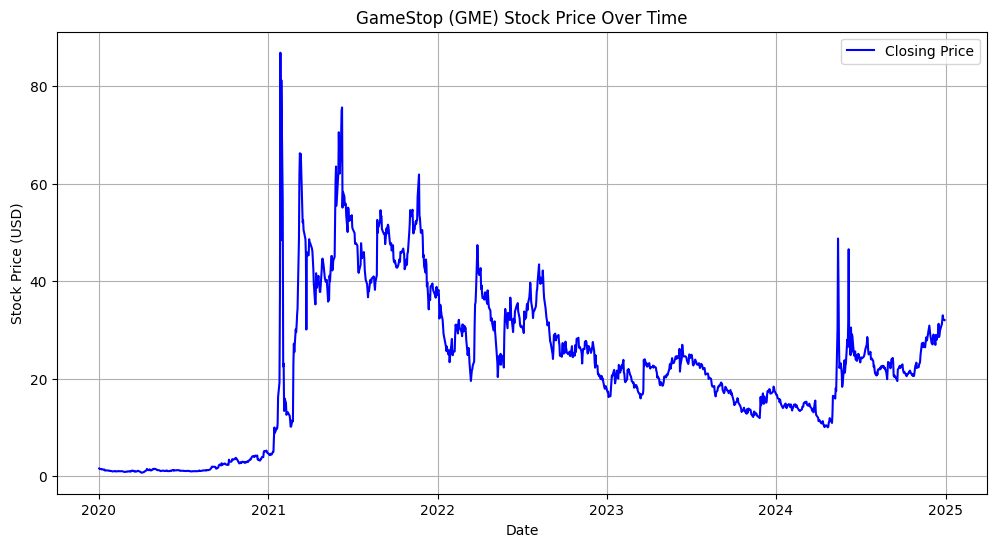

In [9]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
make_graph(gme_data, "GameStop (GME) Stock Price Over Time")
